Car Price Prediction 

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [21]:
car_data=pd.read_csv('car_dataset.csv')


In [22]:
ds=car_data.copy()

In [23]:
ds.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [27]:
ds.shape

(4340, 8)

In [28]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [29]:
ds.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [30]:
print(ds.fuel.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


In [33]:
ds.seller_type.value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [34]:
ds.owner.value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [35]:
ds.transmission.value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [36]:
print(ds.fuel.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64


In [39]:
ds.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
ds.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Individual,Manual,Second Owner


In [47]:
ds.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
ds.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,Second Owner


In [44]:
ds.replace({'Manual':0,'Automatic':1},inplace=True)
ds.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,Second Owner


In [74]:
ds.replace({'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4},inplace=True)

In [75]:
ds.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


In [86]:
X=ds.drop(['name','selling_price'],axis=1)
Y=ds['selling_price']
print(X)
print(Y)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     0            0             0      0
1     2007      50000     0            0             0      0
2     2012     100000     1            0             0      0
3     2017      46000     0            0             0      0
4     2014     141000     1            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     1            0             0      1
4336  2014      80000     1            0             0      1
4337  2009      83000     0            0             0      1
4338  2016      90000     1            0             0      0
4339  2016      40000     0            0             0      0

[4340 rows x 6 columns]
0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [139]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2)

Model Training

1.Linear Regression

In [140]:
lin_reg=LinearRegression()

In [141]:
X_train.shape

(3255, 6)

In [142]:
Y_train.shape

(3255,)

In [143]:
lin_reg.fit(X_train,Y_train)

LinearRegression()

MODEL EVUAL

In [144]:
train_data_pred=lin_reg.predict(X_train)

In [145]:
from sklearn import metrics
error_score=metrics.r2_score(Y_train,train_data_pred)
print("error score:",error_score)

error score: 0.43067854513060333


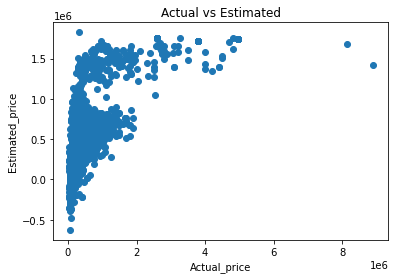

In [146]:
plt.scatter(Y_train,train_data_pred)
plt.xlabel("Actual_price")
plt.ylabel("Estimated_price")
plt.title("Actual vs Estimated")
plt.show()

In [147]:
test_pred_pre=lin_reg.predict(X_test)
error_score=metrics.r2_score(Y_test,test_pred_pre)
print("error score:",error_score)

error score: 0.47507883524929306


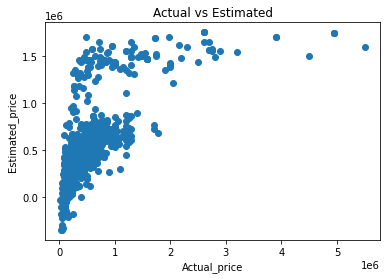

In [151]:
plt.scatter(Y_test,test_pred_pre)
plt.xlabel("Actual_price")
plt.ylabel("Estimated_price")
plt.title("Actual vs Estimated")
plt.show()


In [157]:
#complex boundries

In [159]:
df=car_data.copy()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [315]:
df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
df.replace({'Manual':0,'Automatic':1},inplace=True)
df.replace({'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4},inplace=True)
df["fuel1"]=df.fuel*0.75
df['owner1']=df.owner*0.75
df['km_driven1']=df.km_driven**7

df.describe()






,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel1,owner1,km_driven1
count,4340.000000,4.340000e+03,4340.000000,4340.000000,4340.000000,4340.000000,4340.00000,4340.000000,4340.000000,4.340000e+03
mean,2013.090783,5.041273e+05,66215.777419,0.531336,0.276037,0.103226,0.46659,0.398502,0.349942,8.096728e+17
std,4.215344,5.785487e+05,46644.102194,0.549621,0.496892,0.304289,0.74033,0.412216,0.555247,4.290717e+18
min,1992.000000,2.000000e+04,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-9.223372e+18
25%,2011.000000,2.087498e+05,35000.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-2.046705e+18
50%,2014.000000,3.500000e+05,60000.000000,1.000000,0.000000,0.000000,0.00000,0.750000,0.000000,1.333400e+18
75%,2016.000000,6.000000e+05,90000.000000,1.000000,1.000000,0.000000,1.00000,0.750000,0.750000,4.451581e+18
max,2020.000000,8.900000e+06,806599.000000,4.000000,2.000000,1.000000,4.00000,3.000000,3.000000,9.204198e+18


In [316]:
df.head()
X1=df.drop(['name','selling_price'],axis=1)
Y1=df['selling_price']
print(X1)
print(Y1)

      year  km_driven  fuel  seller_type  transmission  owner  fuel1  owner1  \
0     2007      70000     0            0             0      0   0.00    0.00   
1     2007      50000     0            0             0      0   0.00    0.00   
2     2012     100000     1            0             0      0   0.75    0.00   
3     2017      46000     0            0             0      0   0.00    0.00   
4     2014     141000     1            0             0      1   0.75    0.75   
...    ...        ...   ...          ...           ...    ...    ...     ...   
4335  2014      80000     1            0             0      1   0.75    0.75   
4336  2014      80000     1            0             0      1   0.75    0.75   
4337  2009      83000     0            0             0      1   0.00    0.75   
4338  2016      90000     1            0             0      0   0.75    0.00   
4339  2016      40000     0            0             0      0   0.00    0.00   

               km_driven1  
0    -20467

In [317]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.25,random_state=2)

In [318]:
lin_reg1=LinearRegression()
lin_reg1.fit(X1_train,Y1_train)
train_data_pred1=lin_reg1.predict(X1_train)
from sklearn import metrics
error_score1=metrics.r2_score(Y1_train,train_data_pred1)
print("error score:",error_score1)


error score: 0.03573363894433235


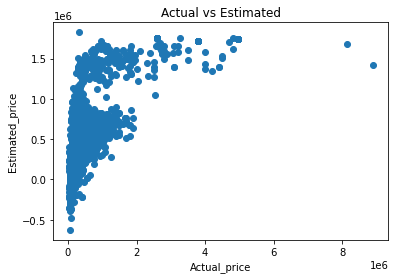

In [319]:
plt.scatter(Y_train,train_data_pred)
plt.xlabel("Actual_price")
plt.ylabel("Estimated_price")
plt.title("Actual vs Estimated")
plt.show()

error score: 0.05341643137380092


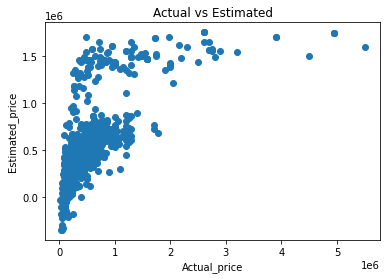

In [320]:
test_pred_pre1=lin_reg1.predict(X1_test)
error_score1=metrics.r2_score(Y1_test,test_pred_pre1)
print("error score:",error_score1)
plt.scatter(Y_test,test_pred_pre)
plt.xlabel("Actual_price")
plt.ylabel("Estimated_price")
plt.title("Actual vs Estimated")
plt.show()